### NLP 멋진 단어 사전 만들기 

### 데이터 분석 & 정제시키기


In [6]:
#프로젝트 사용될 라이브러리 import 
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [15]:
#train txt 파일 선택 
import os
path_to_file = os.getenv('HOME')+'/aiffel/Naver_sentiment/nsmc-master/ratings_train.txt'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 150001
Example:
>> id	document	label
>> 3989148	약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.	1
>> 4805788	이 영화가 왜 이렇게 저평가 받는지 모르겠다	1
>> 8317483	백봉기 언제나오나요?	1
>> 9801316	아햏햏 아햏햏 아햏햏.	1


아래 소스는 문장의 최단 길이, 최장 길이, 평균 길이를 구한 후 문장 길이 분포를 막대그래프로 표현해주는 소스입니다. raw 변수는 앞서 다운로드받은 데이터가 담긴 변수입니다!

문장의 최단 길이: 8
문장의 최장 길이: 168
문장의 평균 길이: 45


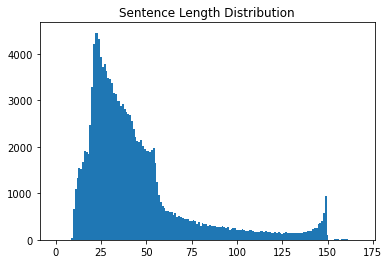

In [16]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

1) 길이 8 짜리 문장은 도대체 어떻게 생겨먹었지?

2) 앞에 치솟는 임의의 구간은 뭐지? 유의미한 데이터가 담겨있는 부분인가?

3) 어디서부터 어디까지 잘라서 쓰지?


In [37]:
#길이 8짜리 문장 뽑아내고 싶지만, 아래 parameter를 어떻게 조율해야할 지 잘 모르겠음.
def check_sentence_with_length(raw, length):
    count = 8
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 8
            if count < 9: return

check_sentence_with_length(raw, 8)

6859	짱	1


In [39]:
#영화 평가인데 터무니 없게 짧고 의미없는 평가들은 삭제하기 위해 문장 수가 10개 보다 작은 것들 추출해봄 
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 10개 보다 작은것을 추출해냄.
    if _sum < 10:
        print("Outlier Index:", idx+1)

Outlier Index: 1
Outlier Index: 2
Outlier Index: 3
Outlier Index: 4
Outlier Index: 5
Outlier Index: 6
Outlier Index: 7
Outlier Index: 8
Outlier Index: 9
Outlier Index: 152
Outlier Index: 153
Outlier Index: 154
Outlier Index: 155
Outlier Index: 157
Outlier Index: 158
Outlier Index: 160
Outlier Index: 163
Outlier Index: 164
Outlier Index: 165
Outlier Index: 166
Outlier Index: 167
Outlier Index: 168


In [40]:
check_sentence_with_length(raw, 11)

7348295	아	0
7679615	잼	1
7117896	1	0
6478189	4	0
5890638	4	0
775332	최고	1
3412704	굿	1
7030708	짱	1
7910238	휴	1
423224	^^	1
7957379	.	1
7916532	1	0
7882871	굿	1
6959675	?	1
5452516	?	0
135585	ㅋㅋ	0
7117918	ㅎ	1
1403313	굿	1
7274727	ㅋ	1
7533102	굿	1
4920691	즐	0
7131270	♥	1
190750	당연	1
2310642	굳	1
7774007	ㅋ	0
965357	최고	1
7057331	네	1
7916647	ㅎ	0
4967352	ㅋ	1
775659	쵝오	1
6518265	굿	0
7134446	ㅇ	0
6886740	.	1
2218743	굿	1
6631225	굿	1
7933682	굳	1
23412	잼없다	0
7260203	ㅠ	1
7651117	?	0
7916517	1	0
7092995	ㅋ	1
1640173	굿	0
6931782	쒯	0
4065837	굿	1
3042281	굿	1
136593	gg	1
286425	;;	0
565434	조앙	1
7318841	굳	1
6994608	♬	1
7503404	굿	1
4458814	토	1
7143066	ㅋ	1
7594043	ㅋ	0
7136480	굿	1
7204900	ㅋ	1
7473056	굿	1
6876426	O	1
5873214	똥	0
5087535	ㅎ	0
7028687	.	0
6642272	굿	1
7505484	ㅎ	1
298699	좋음	1
7899011	짱	1
8009978	굳	1
7813306	굿	1
2479318	굿	1
5238354	짱	1
1494330	?	0
7452959	z	0
4886403	굿	1
7402090	짱	1
163702	mm	0
4903820	굳	1
5666738	ㅇ	1
7080841	헐	0
7513278	굳	1
7798656	굳	1
7805364	굿	1
7272767	굿	1
7315331	굿	1
6386670	삼	0
6383

중복 제거는 Python의 기본 자료형 set을 활용할 겁니다. set은 집합을 정의하는 자료형인데, 중복을 허용하지 않아 변환 과정에서 자동으로 중복된 요소를 제거해주거든요! 대신 list의 순서가 뒤죽박죽될 수 있으니, 만약 번역 데이터처럼 쌍을 이뤄야 하는 경우라면 주의해서 사용하셔야 합니다!

중복을 제거한 후, 앞에서 분포를 확인한 소스를 다시 실행 시켜 보겠습니다!

Data Size: 150001
문장의 최단 길이: 8
문장의 최장 길이: 168
문장의 평균 길이: 45


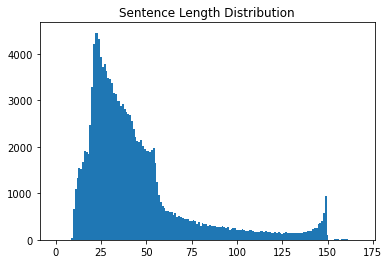

In [44]:
min_len = 10
max_len = 150
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

Data Size: 150001에서 변화가 없음.. 중복되는 데이터가 없는 걸로 간주하고 다음 것 진행하겠음. 

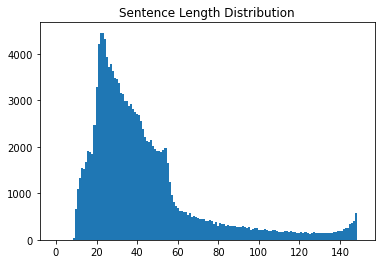

In [46]:
#최대길이 150, 최소 길이 10으로 설정
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

---

### Step 1. Sentence Piece 사용하기 

SentencePiece는 SentencePiece는 Google에서 제공하는 오픈소스 기반 Sentence Tokenizer/Detokenizer 로서, BPE와 unigram 2가지 subword 토크나이징 모델 중 하나를 선택해서 사용할 수 있도록 패키징한 것입니다. 아래 링크의 페이지에서 상세한 내용을 파악할 수 있습니다.

google/sentencepiece
위 페이지의 서두에서도 언급하고 있듯, SentencePiece는 딥러닝 자연어처리 모델의 앞부분에 사용할 목적으로 최적화되어 있는데, 최근 pretrained model들이 거의 대부분 SentencePiece를 tokenizer로 채용하면서 사실상 표준의 역할을 하고 있습니다. 앞으로의 실습 과정에서 자주 만나게 될 것이므로 꼭 친숙해지시기를 당부드립니다.

다음과 같이 설치를 진행합니다. SentencePiece는 python에서 쓰라고 만들어진 라이브러리는 아니지만 편리한 파이썬 wrapper를 아래와 같이 제공하고 있습니다.     

$ pip install sentencepiece


### Step 2. SentencePiece 모델학습

In [48]:
#tokenize() 함수 

def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

위와 같이 tf.keras.preprocessing.text.Tokenizer에 corpus를 주고 tokenizer.fit_on_texts(corpus)을 하면 토크나이저 내부적으로 단어사전과 토크나이저 기능을 corpus에 맞춤형으로 자동생성해 주는 것입니다.

그럼 이를 위해서 SentencePiece 모델을 학습하는 과정을 거쳐야 합니다.

In [49]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/Naver_sentiment/nsmc-master/ratings_train.txt'
vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*


-rw-rw-r-- 1 ssac8 ssac8 368158  4월  6 17:57 korean_spm.model
-rw-rw-r-- 1 ssac8 ssac8 137644  4월  6 17:57 korean_spm.vocab


위 코드를 실행하면 정상적으로 SentencePiece 모델 학습이 완료된 후 koreanspm.model 파일과 koreanspm.vocab vocabulary 파일이 생성되었음을 확인할 수 있습니다.

그럼 이렇게 학습된 SentencePiece 모델을 어떻게 활용하는지 살펴보겠습니다.

In [50]:
#토크나이징 실력 테스트 
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[2076, 14, 385, 20, 2034, 14, 129, 24, 6]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


### Step 3. Tokenizer 함수 작성
우리는 위에서 훈련시킨 SentencePiece를 활용하여 위 함수와 유사한 기능을 하는 sp_tokenize() 함수를 정의할 겁니다. 하지만 SentencePiece가 동작하는 방식이 단순 토큰화와는 달라 완전히 동일하게는 정의하기 어렵습니다. 그러니 아래 조건을 만족하는 함수를 정의하도록 하습니다.

1) 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 를 전달합니다.

2) 생성된 vocab 파일을 읽어와 { <word> : <idx> } 형태를 가지는 word_index 사전과 { <idx> : <word>} 형태를 가지는 index_word 사전을 생성하고 함께 반환합니다.

3) 리턴값인 tensor 는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding은 당연히 해야겠죠?

In [51]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [55]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었지만', '토할 것 같습니다']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[ 589 4053   18 1066 3463]
 [ 807  113  155 3302    0]]


일단 NLP 부분과 함께 파이썬 코딩이 약하다보니 정말 가능한 것들만 실현하였습니다. ㅠㅠ
혹시나 노드 진행 시, 참고할 만한 실행 방식이 있다면 공유 주시면 많은 도움이 될 것 같습니다! 
감사합니다. 